# WCD Web Scraping Project

### Getting started

In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
import pandas as pd
import bs4
from bs4 import BeautifulSoup
import requests as re
from time import sleep #
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

#  Block Code To Extract Webpages Content

In [3]:
#Open main page
driver = webdriver.Chrome('C:\\Users\\samad\\Documents\\Courses\\Data Science Emmersive WCD\Python\\chromedriver_win32\\chromedriver.exe')
driver.get("https://www.tripadvisor.ca")

#wait few seconds to start searching
sleep(random.uniform(1.9, 3.2))

#search for the desired outcomes in the website using Selenium
search = driver.find_element_by_xpath('/html/body/div/main/div[2]/div/div/div[2]/div[2]/div')
search.click()
enter_search = driver.find_element_by_xpath('/html/body/div/main/div[2]/div/div/div[2]/div[2]/div[2]/form/input[1]')
enter_search.send_keys('trips from toronto')
enter_search.send_keys(Keys.RETURN)

#wait few seconds for the data to load
sleep(random.uniform(1.9, 3.2))

#filter by desired type('things to do')
driver.find_element_by_xpath('//*[@id="search-filters"]/ul/li[5]/a').click()


In [4]:
#define data elements in dictionaries
data = {
    'activity_type': [],
    'titles': [],
    'reviews_count':[],
    'address':[],
    'ratings':[]}        

# set a starting page number
page = 1 

#set a while loop to keep browsing through pages to the last page
end_pages = False

while end_pages == False:
    try:
#Scroll to the end of the page
        sleep(random.uniform(2, 5))
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        
#capture page contents to analyze it using Beautifulsoup
        content = bs4.BeautifulSoup(driver.page_source,'lxml')      

#append desired data to lists    
    #title        
        i=0
        for tag in content.select('.result-title'):
            try:
                i+=1
                title = tag.get_text(strip=True)
                data['titles'].append([title,(page,i)])
                
            except:
                i+=1
                data['titles'].append(['None',(page,i)])

    #reviews count
        i=0
        for tag in content.select('.rating-review-count'):
            try:
                i+=1
                review = tag.get_text(strip=True).split(' ')[0]
                data['reviews_count'].append([review,(page,i)])
                
            except:
                i+=1
                data['reviews_count'].append(['None',(page,i)])               
                
    #address
        i=0
        for tag in content.select('.address'):
            try:
                i+=1
                addresses = tag.get_text(strip=True)
                data['address'].append([addresses,(page,i)])
                
            except:
                i+=1
                data['address'].append(['None',(page,i)])
                
    #ratings
        i=0
        for tag in content.find_all('div',class_='prw_rup prw_common_responsive_rating_and_review_count'):
            try:
                i+=1
                rating = str(tag.find_all('span')).split(' ')[1:4]
                rating = ' '.join(rating)
                rating=rating.split()[0]
                rating = ''.join(rating)[5:]    
                data['ratings'].append([rating,(page,i)])
            except:
                i+=1
                data['ratings'].append(['None',(page,i)])
    
        
    #activity type
        i=0
        for tag in content.select('.thumbnail-overlay-tag'):
            try:
                i+=1
                activity = tag.get_text(strip=True)
                data['activity_type'].append([activity,(page,i)])
            except:
                i+=1
                data['activity_type'].append(['None',(page,i)])
                                    

        sleep(random.uniform(2, 5))
        print(page)
        page += 1

#print the length of data to find the missing elements and the corrisponding page number        
        print(len(data['ratings']))
        print(len(data['activity_type']))
        
#go to the next page
        driver.find_element_by_link_text('Next').click()        

    except:
        end_pages = True
        driver.close()

1
30
29
2
60
59
3
90
88
4
120
117
5
150
145
6
180
175
7
210
205
8
240
235
9
270
264
10
300
294
11
330
322
12
360
351
13
390
380
14
420
410
15
450
440
16
480
469
17
510
497
18
540
527
19
570
557
20
600
586
21
630
616
22
660
646
23
690
675
24
720
701
25
750
726
26
779
756
27
809
785
28
839
815
29
869
845
30
899
875
31
929
905
32
959
935
33
989
965
34
1019
995


In [5]:
print(len(data['activity_type']))
print(len(data['titles']))
print(len(data['reviews_count']))
print(len(data['address']))
print(len(data['ratings']))

995
1020
1020
1020
1019


# Cleaning Data

- Finding missing data
- Matching indexes

# DataFrame

Manually fix data of activity_type and ratings in order to align the assigned index with other columns
This is done to connect each assigned index to the listing in the website

.

In [7]:
pd.DataFrame(data['ratings']).to_csv('ratings.csv',index=False)
pd.DataFrame(data['activity_type']).to_csv('activity_type.csv',index=False)

In [8]:
data['activity_type']= pd.read_csv('new_activity_type.csv')

activity_type= pd.DataFrame(data['activity_type'],columns=['activity_type','assigned_index'])

titles = pd.DataFrame(data['titles'], columns=['titles','assigned_index'])

reviews_count= pd.DataFrame(data['reviews_count'], columns=['reviews_count','assigned_index'], dtype=int)

address= pd.DataFrame(data['address'], columns=['address','assigned_index'], dtype=str)

data['ratings'] = pd.read_csv('new_ratings.csv')
ratings= pd.DataFrame(data['ratings'],columns=['ratings','assigned_index'])

In [293]:
#unifying length of columns after cleaning data
print(len(data['activity_type']))
print(len(data['titles']))
print(len(data['reviews_count']))
print(len(data['address']))
print(len(data['ratings']))

1020
1020
1020
1020
1020


.

- Replacing indexes to match other tables format
- All tables have the same order of assigned_index

.

In [9]:
activity_type['assigned_index']= titles['assigned_index']
ratings['assigned_index']= titles['assigned_index']

# Merging data using the assigned index

In [10]:
new1= pd.merge(titles,reviews_count, how='left', left_on=['assigned_index'], right_on=['assigned_index'])
new2= pd.merge(new1,address, how='left', left_on=['assigned_index'], right_on=['assigned_index'])
new3= pd.merge(new2,ratings, how='left', left_on=['assigned_index'], right_on=['assigned_index'])
trips= pd.merge(new3,activity_type, how='left', left_on=['assigned_index'], right_on=['assigned_index'])


In [294]:
trips.head()

titles  reviews_count                                            address  ratings                  activity_type            address1  address2        address3
page order                                                                                                                                                                                 
1    1          Toronto Island Park           8431  9 Queens Quay West, Toronto, Ontario, Canada9 ...      4.5                        Islands  9 Queens Quay West   Toronto         Ontario
     2                   UP Express           3129                    Toronto, Ontario, CanadaToronto      4.5  Public Transportation Systems             Toronto   Ontario   CanadaToronto
     3      Royal Alexandra Theatre           1402  260 King St W, Toronto, Ontario, Canada260 Kin...      4.5                       Theatres       260 King St W   Toronto         Ontario
     4                     CN Tower          24993  290 Bremner Blvd, Toronto, Ontario, Canada290 ...      4.5        Architectural Buildings    290 Bremner Blvd   Toronto         Ontario
     5      Toronto Islands Ferries           1088  9 Queens Quay W, Toronto, Ontario, Canada9 Que...      4.5                        Ferries     9 Queens Quay W   Toronto         Ontario

# MultiIndexing based on page number and listing number
 - multiindex using the assigned_index column
 - dropping the assigned_index column

In [12]:
trips.set_index(pd.MultiIndex.from_tuples(titles['assigned_index']), inplace=True)
trips.head(31)

titles assigned_index reviews_count                                            address  ratings                  activity_type
1 1              Toronto Island Park         (1, 1)         8,431  9 Queens Quay West, Toronto, Ontario, Canada9 ...      4.5                        Islands
  2                       UP Express         (1, 2)         3,129                    Toronto, Ontario, CanadaToronto      4.5  Public Transportation Systems
  3          Royal Alexandra Theatre         (1, 3)         1,402  260 King St W, Toronto, Ontario, Canada260 Kin...      4.5                       Theatres
  4                         CN Tower         (1, 4)        24,993  290 Bremner Blvd, Toronto, Ontario, Canada290 ...      4.5        Architectural Buildings
  5          Toronto Islands Ferries         (1, 5)         1,088  9 Queens Quay W, Toronto, Ontario, Canada9 Que...      4.5                        Ferries
  6                  Via Rail Canada         (1, 6)           454  65 Front St W, Toronto, Ontario, Canada65 Fron...      4.0  Public Transportation Systems
  7                 Scotiabank Arena         (1, 7)         1,746  40 Bay St, Toronto, Ontario, Canada40 Bay St, ...      4.5              Arenas & Stadiums
  8              St. Lawrence Market         (1, 8)        13,863  92-95 Front St. E., Toronto, Ontario, Canada92...      4.5          Flea & Street Markets
  9      Ripley's Aquarium of Canada         (1, 9)        20,285  288 Bremner Boulevard, Toronto, Ontario, Canad...      4.5                      Aquariums
  10                Niagara Day Tour        (1, 10)         1,160  149 Highbourne Road, Toronto, Ontario, Canada1...      5.0              Sightseeing Tours
  11                 FlyGTA Airlines        (1, 11)           287  Hangar 1, Toronto, Ontario, CanadaHangar 1, To...      4.5                      Air Tours
  12    Distillery Historic District        (1, 12)         8,184  55 Mill St, Toronto, Ontario, Canada55 Mill St...      4.5         Historic Walking Areas
  13                 Aga Khan Museum        (1, 13)           824  77 Wynford Dr, Toronto, Ontario, Canada77 Wynf...      4.5             Speciality Museums
  14        Zoom Tours Niagara Falls        (1, 14)           843  215 Carlingview Dr, Toronto, Ontario, Canada21...      4.5              Sightseeing Tours
  15                     Toronto Zoo        (1, 15)         4,885  2000 Meadowvale Rd, Toronto, Ontario, Canada20...      4.0                           Zoos
  16                         Megabus        (1, 16)           174                    Toronto, Ontario, CanadaToronto      2.0                   Bus Services
  17     TBCL - Toronto Bus Co. Ltd.        (1, 17)           203  110 Skyway Ave, Toronto, Ontario, Canada110 Sk...      4.5              Sightseeing Tours
  18            Royal Ontario Museum        (1, 18)         8,266  100 Queen's Park, Toronto, Ontario, Canada100 ...      4.5             Speciality Museums
  19           Toronto Bicycle Tours        (1, 19)         1,294  275 Dundas St W, Toronto, Ontario, Canada275 D...      5.0              Sightseeing Tours
  20     Airlink Niagara Falls Tours        (1, 20)           246                    Toronto, Ontario, CanadaToronto      4.5              Sightseeing Tours
  21                     UTOvacation        (1, 21)            88                    Toronto, Ontario, CanadaToronto      4.5                            NaN
  22       Princess of Wales Theatre        (1, 22)         1,598  284 King St W, Toronto, Ontario, Canada284 Kin...      4.5                       Theatres
  23  Queen Tour Niagara Falls Tours        (1, 23)           379  111 Peter St, Toronto, Ontario, Canada111 Pete...      4.5              Sightseeing Tours
  24                   Toronto Union        (1, 24)           867  65 Front St W, Toronto, Ontario, Canada65 Fron...      3.5        Architectural Buildings
  25               Epic Sportfishing        (1, 25)           111  7 Brimley Rd S, Toronto, Ontario, Cana

In [13]:
trips.index

MultiIndex([( 1,  1),
            ( 1,  2),
            ( 1,  3),
            ( 1,  4),
            ( 1,  5),
            ( 1,  6),
            ( 1,  7),
            ( 1,  8),
            ( 1,  9),
            ( 1, 10),
            ...
            (34, 21),
            (34, 22),
            (34, 23),
            (34, 24),
            (34, 25),
            (34, 26),
            (34, 27),
            (34, 28),
            (34, 29),
            (34, 30)],
           length=1020)

In [14]:
trips.index.names = ['page','order']
trips= trips.drop('assigned_index',axis=1)
trips

titles reviews_count                                            address  ratings                  activity_type
page order                                                                                                                                        
1    1                Toronto Island Park         8,431  9 Queens Quay West, Toronto, Ontario, Canada9 ...      4.5                        Islands
     2                         UP Express         3,129                    Toronto, Ontario, CanadaToronto      4.5  Public Transportation Systems
     3            Royal Alexandra Theatre         1,402  260 King St W, Toronto, Ontario, Canada260 Kin...      4.5                       Theatres
     4                           CN Tower        24,993  290 Bremner Blvd, Toronto, Ontario, Canada290 ...      4.5        Architectural Buildings
     5            Toronto Islands Ferries         1,088  9 Queens Quay W, Toronto, Ontario, Canada9 Que...      4.5                        Ferries
...                                   ...           ...                                                ...      ...                            ...
34   26           Caroline Cellars Winery           588  2-1010 Line, Virgil, Niagara-on-the-Lake, Onta...      4.5                       Theatres
     27                        400 Market            76  Hwy 400, Innisfil, Ontario, CanadaHwy 400, Inn...      4.0           Wineries & Vineyards
     28        IMAX Theatre Niagara Falls           553  6170 Fallsview Blvd, Niagara Falls, Ontario, C...      3.5                  Antique Shops
     29     Mount Carmel Spiritual Centre            65  7020 Stanley Ave, Niagara Falls, Ontario, Cana...      4.5                        Cinemas
     30           Dinosaur Adventure Golf           805  4960 Clifton Hill, Niagara Falls, Ontario, Can...      4.5                   Golf Courses

[1020 rows x 5 columns]

In [15]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1020 entries, (1, 1) to (34, 30)
Data columns (total 5 columns):
titles           1020 non-null object
reviews_count    1020 non-null object
address          1020 non-null object
ratings          1019 non-null float64
activity_type    995 non-null object
dtypes: float64(1), object(4)
memory usage: 42.4+ KB


# Change data type for reviews_count to (int)
    
    -clean the data and deal with missing values

In [16]:
trips['reviews_count']=trips['reviews_count'].astype(str).str.replace(',',"")

In [17]:
#not available count set to zero

trips['reviews_count'].loc[26].loc[2]=0
trips['reviews_count'].loc[26].loc[2]

0

In [18]:
trips['reviews_count']=trips['reviews_count'].astype(int)

In [21]:
trips['reviews_count']=trips['reviews_count'].fillna(0)

In [19]:
trips[trips.isnull().any(axis=1)]

titles  reviews_count                                            address  ratings  activity_type
page order                                                                                                                                   
1    21                                 UTOvacation             88                    Toronto, Ontario, CanadaToronto      4.5            NaN
3    18                          Aerofleet Services             30                    Toronto, Ontario, CanadaToronto      3.0            NaN
4    16                                   King tour             11                    Toronto, Ontario, CanadaToronto      3.5            NaN
5    9                                     401 Limo              7                    Toronto, Ontario, CanadaToronto      5.0            NaN
     18                    Toronto Urban Adventures            514  25 Cole St Unit 615, Toronto, Ontario, Canada2...      5.0            NaN
9    23      Best Tours - Chocolate Tour of Toronto             59  425 King St W, Toronto, Ontario, Canada425 Kin...      2.0            NaN
11   16         Time Of Your Life Tours - Day Tours              5  500 Sheppard Ave E, Toronto, Ontario, Canada50...      4.0            NaN
     22                   Toronto Airport Limousine              7                    Toronto, Ontario, CanadaToronto      2.0            NaN
12   20                Toronto Pearson Airport Taxi             19  8 Charlotte St, Toronto, Ontario, Canada8 Char...      3.5            NaN
13   7                                      Vikaspa            141  88 Avenue Rd, Toronto, Ontario, Canada88 Avenu...      1.5            NaN
16   22            St. Lawrence Centre for the Arts             22  27 Front St E, Toronto, Ontario, Canada27 Fron...      3.5            NaN
17   9                       Flesherton Art Gallery             17  22 Collingwood Street., Flesherton, Grey Count...      4.5            NaN
18   1                        Rose Theatre Brampton            279  1 Theatre Lane, Brampton, Ontario, Canada1 The...      4.5            NaN
20   9                               Cube Nightclub             14  Toronto, ON M5V 2A4, Canada 14 Queen St W, Tor...      3.0            NaN
23   23                            4th Line Theater             58  4 Tupper Street, Millbrook, Ontario, Canada4 T...      3.5            NaN
24   14                                     Allen's             12  143 Danforth Ave, Toronto, Ontario, Canada143 ...      3.5            NaN
     19                         Airport Limo & Taxi              1                    Toronto, Ontario, CanadaToronto      5.0            NaN
     20                               Grande Cheese              4  22 Orfus Rd, Toronto, Ontario, Canada22 Orfus ...      5.0            NaN
     28     Bakka Phoenix Science Fiction Bookstore              6  84 Harbord St, Toronto, Ontario, Canada84 Harb...      5.0            NaN
25   1                             Dead Dog Records              4  1209 Bloor St W, Toronto, Ontario, Canada1209 ...      4.0            NaN
     3                            Airline Limousine              1                    Toronto, Ontario, CanadaToronto      5.0            NaN
     4               Toronto Airport Limo Flat Rate              1                    Toronto, Ontario, CanadaToronto      5.0            NaN
     6                     Airport Limousine Canada              2                    Toronto, Ontario, CanadaToronto      5.0            NaN
     12                            Toronto Town Car              2  523 Candlestick Cir, Toronto, Ontario, Canada5...      3.0            NaN
26   2              Niagara falls tour from Toronto              0                    Toronto, Ontario, CanadaToronto      NaN  Private Tours
27   13                   Dorchester & Norfolk Limo             49  4234 Hamilton Rd, Dorchester, London, Ontario,...      3.0            NaN

.

# Replace missing values in activity_type to 'Not Available'

.

In [20]:
trips['activity_type'] = trips['activity_type'].replace(np.nan, 'Not Available')
#checking that it worked
trips.loc[1].loc[21]

titles                               UTOvacation
reviews_count                                 88
address          Toronto, Ontario, CanadaToronto
ratings                                      4.5
activity_type                      Not Available
Name: 21, dtype: object

In [52]:
trips['activity_type'].value_counts().head(10)

Sightseeing Tours                 58
Parks                             53
Boat Tours                        38
Speciality & Gift Shops           35
Wineries & Vineyards              34
Nature & Wildlife Areas           31
Speciality Museums                28
Historic Sites                    27
Points of Interest & Landmarks    27
Theatres                          25
Name: activity_type, dtype: int64

# Analysis
    - Exploring data and finding relationships

In [94]:
by_title=trips.groupby(by=['titles']).sum()
by_title= by_title.sort_values(by=['reviews_count','ratings'], ascending=False)
by_title

,reviews_count,ratings
titles,,
Niagara Falls Canada,31384,5.0
CN Tower,24993,4.5
Ripley's Aquarium of Canada,20285,4.5
St. Lawrence Market,13863,4.5
Journey Behind the Falls,10144,4.0
...,...,...
Secret Planet Print Shop,1,5.0
Toronto Airport Limo Flat Rate,1,5.0
Eastern Sound Studio,1,4.0


# Finding top activity types based on ratings and review counts

In [214]:
by_activity=trips.groupby('activity_type').agg({'reviews_count': np.sum, 'ratings': np.mean})
by_activity= by_activity.sort_values(['reviews_count','ratings'],ascending=False)
by_activity.head(5).transpose()

activity_type,Waterfalls,Architectural Buildings,Sightseeing Tours,Aquariums,Speciality Museums
reviews_count,44514.000000,38501.00000,25316.000000,21680.0,19446.000000
ratings,4.307692,4.28125,4.551724,4.0,4.321429


In [235]:
Nature_Parks= trips[(trips['activity_type'] == 'Nature & Wildlife Areas') | (trips['activity_type'] == 'Parks')][['titles','ratings','reviews_count']]
Nature_Parks=Nature_Parks.set_index('titles')
Nature_Parks=Nature_Parks.sort_values(['reviews_count','ratings'],ascending=False)
Nature_Parks

,ratings,reviews_count
titles,,
Butterfly Conservatory,4.5,5734
Niagara Fallsview Casino,4.0,4137
Clifton Hill,4.0,3727
High Park,4.5,2267
The Strong National Museum of Play,5.0,2143
Konzelmann Estate Winery,4.5,2137
George Eastman Museum,4.5,1032
Darien Lake Amusement Park,3.5,864
Jackson-Triggs Winery,4.5,727


# Visualization

In [262]:
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure

''

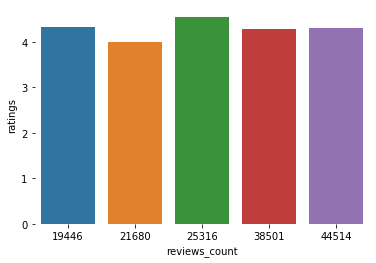

In [217]:
g=sns.barplot(by_activity['reviews_count'].head(5), by_activity['ratings'].head(5))
sns.despine(left = True, bottom = True)
g.figure.savefig("reviews-ratings.png")
;

''

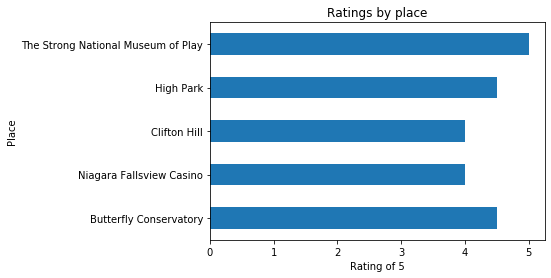

In [290]:
Nature1=Nature_Parks.head(5)
Nature1.sort_values(['ratings'],ascending=False)

ax=Nature1['ratings'].plot( kind='barh', label = 'ratings', title='Ratings by place')


ax.set_ylabel('Place')
ax.set_xlabel('Rating of 5')

ax.figure.savefig('rating-place')
;

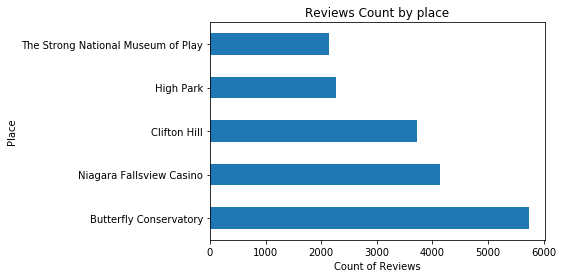

<Figure size 360x360 with 0 Axes>

In [296]:
ax3=Nature_Parks['reviews_count'].head(5).plot( kind='barh', label = 'Reviews Count', title='Reviews Count by place')

figure(figsize=(5,5))

ax3.set_ylabel('Place')
ax3.set_xlabel('Count of Reviews')

ax1.figure.savefig('reviews-place')


plt.tight_layout();

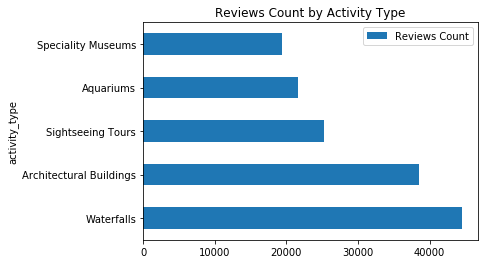

In [221]:
ax = by_activity['reviews_count'].head(5).plot( kind='barh', label = 'Reviews Count', title='Reviews Count by Activity Type')

ax.legend()

ax.figure.savefig('reviews-activity')

.




.




.

# Draft - Work In Progress...

# Getting the street address and city/province name
    
    - Add new columns to analyze them
    - Clean data
    - Get latitude and longitude
    - Heatmap
    - Folium

In [23]:
address1=[]
address2= []
address3=[]
for address in trips['address']:
    address= address.split(',')
    try:
        street_address= address[0]
    except:
        street_address= np.nan
    
    try:
        city= address[1]
    except:
        city= np.nan
    try:
        province= address[2]
    except:
        province= np.nan

    address1.append(street_address)
    address2.append(city)
    address3.append(province)
print(street_address, city,province)
print(len(street_address))
len(city)

4960 Clifton Hill  Niagara Falls  Ontario
17


14

In [24]:
trips['address1']= address1
trips['address2']= address2
trips['address3']= address3
trips[['address1','address2','address3']]

address1        address2              address3
page order                                                           
1    1       9 Queens Quay West         Toronto               Ontario
     2                  Toronto         Ontario         CanadaToronto
     3            260 King St W         Toronto               Ontario
     4         290 Bremner Blvd         Toronto               Ontario
     5          9 Queens Quay W         Toronto               Ontario
...                         ...             ...                   ...
34   26             2-1010 Line          Virgil   Niagara-on-the-Lake
     27                 Hwy 400        Innisfil               Ontario
     28     6170 Fallsview Blvd   Niagara Falls               Ontario
     29        7020 Stanley Ave   Niagara Falls               Ontario
     30       4960 Clifton Hill   Niagara Falls               Ontario

[1020 rows x 3 columns]

In [25]:
#trips[trips['address1']== 'Toronto']= 'nan'

In [26]:
##Open main page
driver = webdriver.Chrome('C:\\Users\\samad\\Documents\\Courses\\Data Science Emmersive WCD\Python\\chromedriver_win32\\chromedriver.exe')
driver.get("https://www.latlong.net/")

 
sleep(random.uniform(2, 3))

address_data= {'latitude':[],
               'longitude':[]}
address_data['address']=trips['address1']+" "+trips['address2'] +" Ontario"

x=0
for address in address_data['address']:
    try:        
#append desired data to lists    

        
            search = driver.find_element_by_xpath('//*[@id="place"]')
            search.click()
            search.send_keys(address)

            sleep(random.uniform(2, 3))

            search.send_keys(Keys.RETURN)


            try:   
                address_data['latitude'].append(driver.find_element_by_xpath('//*[@id="lat"]').get_text())
            except:
                address_data['longitude'].append('Not Found')

            try:
                address_data['longitude'].append(driver.find_element_by_xpath('//*[@id="lng"]').get_text())
            except:
                address_data['longitude'].append('Not Found')

            search = driver.find_element_by_xpath('//*[@id="place"]').clear()

            #wait few seconds for the data to load
            sleep(random.uniform(5.01, 10.1))

            #url = driver.current_url
            x+=1
            print(x)
        except:
            break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


In [27]:
url= 'https://www.google.ca/maps/place/Jack+Layton+Ferry+Terminal,+9+Queens+Quay+W,+Toronto,+ON+M5J+2H3/@43.64019,-79.3772434,17z/data=!3m1!4b1!4m5!3m4!1s0x89d4cb2a21c78a0f:0x16a05d87c397e254!8m2!3d43.6403521!4d-79.3748375'
url2='https://www.google.ca/maps/place/260+King+St+W,+Toronto,+ON+M5V+1H8/@43.6472536,-79.3897163,17z/data=!3m1!4b1!4m5!3m4!1s0x882b34d10ae0f423:0x39f19cf5cfa1de94!8m2!3d43.6472536!4d-79.3875276'

In [31]:
url.split('/')[6]
url2.split('/')[6].split(',')

['@43.6472536', '-79.3897163', '17z']

# Map (Folium)